<a href="https://colab.research.google.com/github/KGuruPrasad94/DS_challenge_C1/blob/main/DS_challenge_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capital One - Data Science Challenge**

**Goal:** To analyze transactions dataset and build a predictive model to detect fraudulent transactions.

**Table of contents - Notebook structure:**

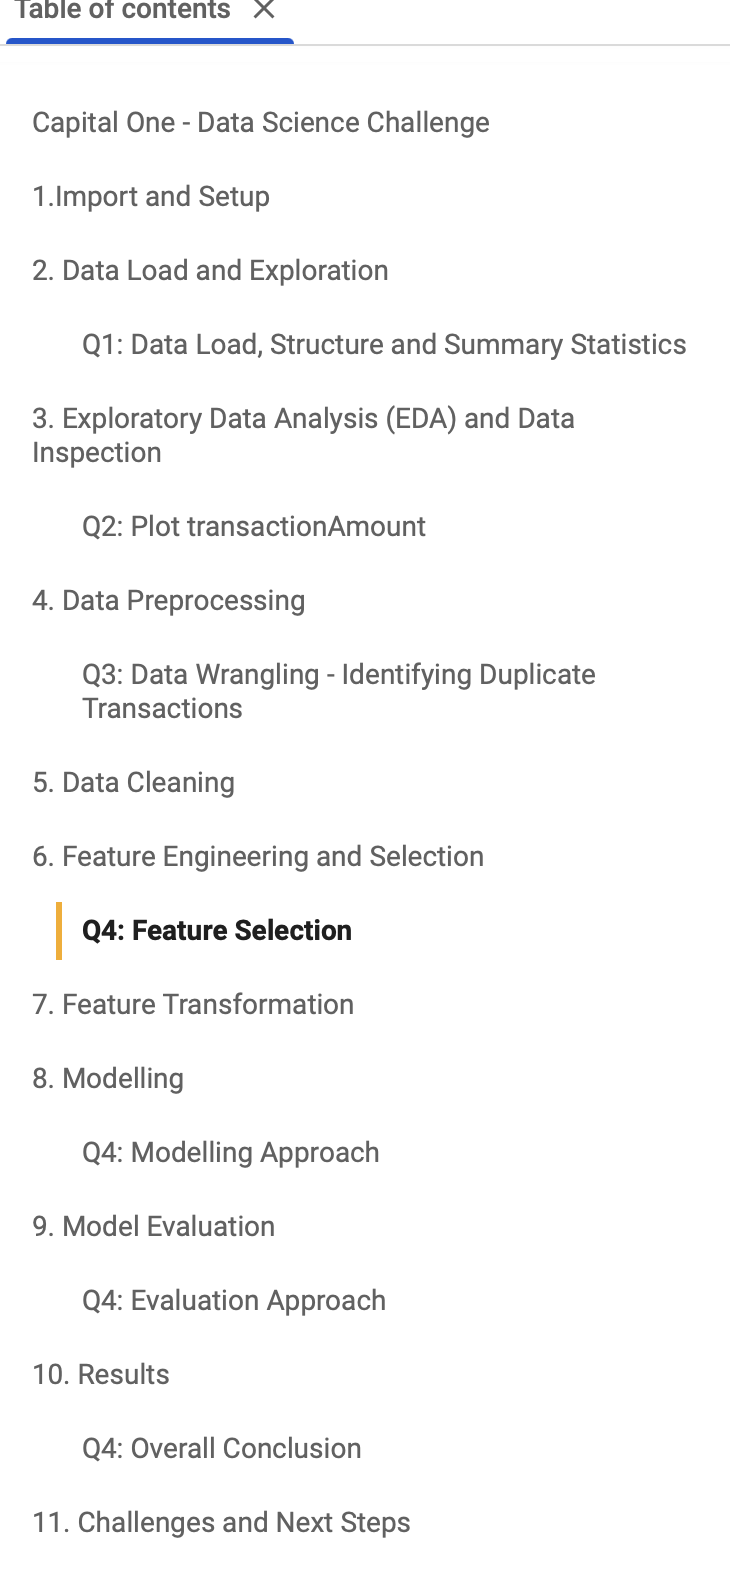

# **1.Import and Setup**

In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import scipy as sp
import os
import random
import requests
import zipfile
import io
from datetime import timedelta

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# setting display settings to view full df
pd.set_option('display.max_columns', None)

# **2. Data Load and Exploration**



### > Q1: Data Load, Structure and Summary Statistics



**Approach:**

1. Programmatically download and load data (JSON file) from a GitHub repository.
2. Describe the shape of the data.
3. Replace whitespace with `np.nan` for null value handling.
4. Inspect the columns in the dataset and check their datatypes using `df.info`.
5. Generate descriptive statistics for numerical columns.
6. Calculate the percentage of missing values in each column.
7. Investigate the relationship between `customerId` and `accountNumber` to check for redundancy.
8. Check for any duplicate records in the data.

---

**Insights:**

1. The credit transactions dataset contains **786,363 rows** and **29 columns**. All transactions are from the year 2016.
2. Column data types include:
   - **Timestamp**: 4 columns
   - **Boolean**: 3 columns
   - **Categorical**: 7 columns
   - **Numerical**: 9 columns
3. Six columns have **100% missing values**, and five additional columns have **less than 1% missing values**.
4. The `accountNumber` and `customerId` columns have a **1:1 mapping**, indicating redundancy.
5. There are **no duplicate rows** in the dataset.
6. The `transactionAmount` column has a minimum value of **$0** and a maximum value of **over $2,000**.
7. The `availableMoney` column has a minimum value of **-$1,000**, suggesting that some customers have overutilized their credit.

In [2]:
# load data from github
url = "https://github.com/CapitalOneRecruiting/DS/raw/refs/heads/master/transactions.zip"

response = requests.get(url)
response.raise_for_status()

# unzip file and read with pandas
with zipfile.ZipFile(io.BytesIO(response.content)) as myzip:
    myzip.extractall()

    with myzip.open("transactions.txt") as file:
        df = pd.read_json(file, lines=True)

In [3]:
#inspecting df
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [4]:
# inspecting shape of df
print("Dataset Dimensions: {} x {}".format(df.shape[0], df.shape[1]))

Dataset Dimensions: 786363 x 29


In [5]:
# replacing white space with nan
df = df.replace(r'^\s*$', np.nan, regex=True)

In [6]:
# view dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [7]:
# generate descriptive statistics
df[['creditLimit','availableMoney','transactionAmount','cardCVV','enteredCVV','cardLast4Digits','currentBalance']].describe(include='all').T
#df.describe().T

,count,mean,std,min,25%,50%,75%,max
creditLimit,786363.0,10759.464459,11636.174890,250.00,5000.00,7500.00,15000.000,50000.00
availableMoney,786363.0,6250.725369,8880.783989,-1005.63,1077.42,3184.86,7500.000,50000.00
transactionAmount,786363.0,136.985791,147.725569,0.00,33.65,87.90,191.480,2011.54
cardCVV,786363.0,544.467338,261.524220,100.00,310.00,535.00,785.000,998.00
enteredCVV,786363.0,544.183857,261.551254,0.00,310.00,535.00,785.000,998.00
cardLast4Digits,786363.0,4757.417799,2996.583810,0.00,2178.00,4733.00,7338.000,9998.00
currentBalance,786363.0,4508.739089,6457.442068,0.00,689.91,2451.76,5291.095,47498.81


In [8]:
#checking the percentage of missing values in the dataset
missing_values= df.isnull().sum().sort_values(ascending=False)
total_percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
total_missing_values_percent = pd.concat([missing_values,total_percent],axis=1,keys=['Total_count','Percent'])
total_missing_values_percent

,Total_count,Percent
posOnPremises,786363,100.000000
recurringAuthInd,786363,100.000000
merchantState,786363,100.000000
merchantZip,786363,100.000000
echoBuffer,786363,100.000000
merchantCity,786363,100.000000
acqCountry,4562,0.580139
posEntryMode,4054,0.515538
merchantCountryCode,724,0.092069
transactionType,698,0.088763


In [9]:
#checking unique accounts
print(f"Number of unique account numbers: {df.accountNumber.nunique()}")

#checking unique customers
print(f"Number of unique account numbers: {df.customerId.nunique()}")

# checking if all account number = customer id
print(f"Customer and account number 1:1 mapping exists: {df['accountNumber'].equals(df['customerId'])}")

Number of unique account numbers: 5000
Number of unique account numbers: 5000
Customer and account number 1:1 mapping exists: True


In [10]:
#checking for duplicate values
print(f"Number of duplicate records in dataset: {df.duplicated().sum()}")

Number of duplicate records in dataset: 0


In [11]:
# inspecting transaction date time column
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['transactionDateTime'].dt.year.value_counts()

,count
transactionDateTime,
2016,786363


# **3. Exploratory Data Analysis (EDA) and Data Inspection**



### > **Q2: Plot transactionAmount**



**Insights - Histogram:**

- **Distribution**: The histogram shows a **right-skewed** distribution with most transactions clustered near zero along with a few high-value transactions forming a long tail.
- **Hypothesis**: Large transaction amounts (outliers) might indicate potential fraud as they deviate from typical transaction values.

**Approach**: Apply **scaling or transformation** to reduce skewness, improving model performance in identifying fraud.

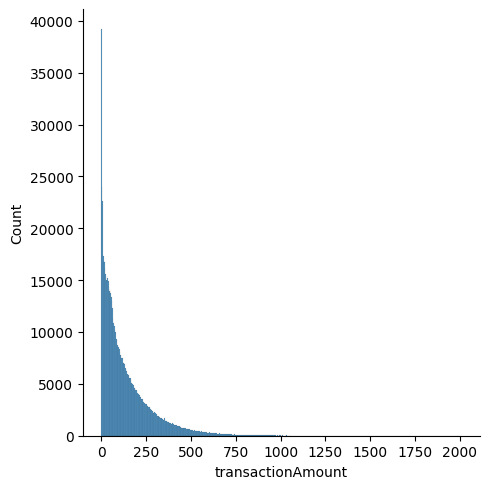

In [12]:
# checking the distribution of "transactionAmount"
sns.displot(df['transactionAmount'])
plt.show()

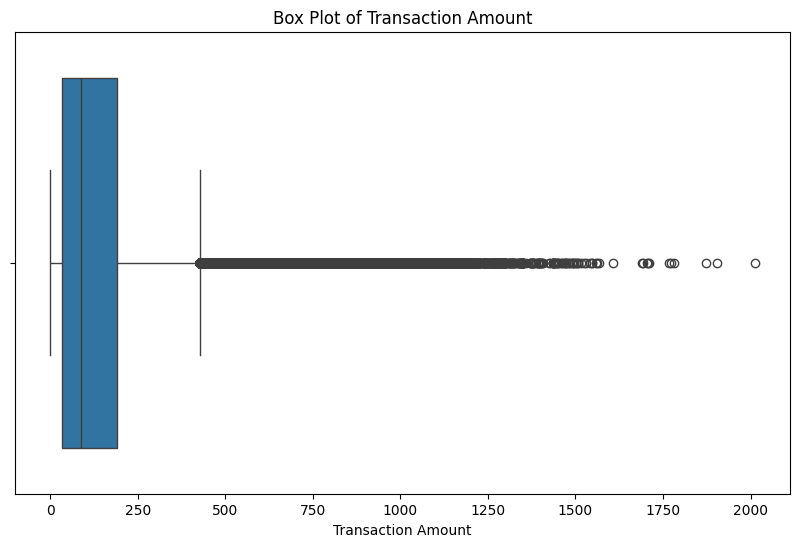

In [13]:
# boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['transactionAmount'])
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

**EDA and Data Inspection**

**Approach:**
1. Inspect transactions with `transactionAmount = $0`.
2. Visualize distributions of currency-related columns.
3. Analyze key columns to identify potential predictors of fraud.
4. Review target column (`isFraud`)  to check for class imbalance.

**Insights:**
1. Most `transactionAmount = $0` transactions are `Address Verification` types, which aren’t actual purchases and can be removed to reduce noise.
2. Columns like `transactionAmount`, `availableMoney`, and `currentBalance` are positively skewed and need scaling.
3. Key columns such as `transactionAmount`, `merchantCountryCode`, `acqCountry`, `merchantCategoryCode`, `posEntryMode`, and `expirationDateKeyInMatch` could be good indicators for predicting fraud.
4. The dataset has a strong class imbalance, with only 1.5% of transactions marked as fraud. Addressing this through oversampling/undersampling is essential for improving model performance.

**3.0 Inspecting Transaction amount**



In [14]:
# further inspection of transactionAmount column where amount = $0
df[df['transactionAmount'] == 0.0].transactionType.value_counts()

,count
transactionType,
ADDRESS_VERIFICATION,20169
PURCHASE,1484
REVERSAL,572


In [15]:
#manual inspection of transactionType = 'Purchase' and transactionAmount = 0$
#df[(df['transactionAmount'] == 0.0) & (df['transactionType']=='PURCHASE')]

In [16]:
# checking fraud counts
df[(df['transactionAmount'] == 0.0) & (df['transactionType']=='PURCHASE')].isFraud.value_counts()

,count
isFraud,
False,1484


In [17]:
# checking merchant Category
df[(df['transactionAmount'] == 0.0) & (df['transactionType']=='PURCHASE')].merchantCategoryCode.value_counts()

,count
merchantCategoryCode,
fuel,670
mobileapps,398
online_subscriptions,228
gym,113
cable/phone,38
food_delivery,16
online_retail,5
entertainment,5
food,3


**3.1 Inspecting the distribution of currency columns**

array([[<Axes: title={'center': 'creditLimit'}>,
        <Axes: title={'center': 'availableMoney'}>],
       [<Axes: title={'center': 'transactionAmount'}>,
        <Axes: title={'center': 'currentBalance'}>]], dtype=object)

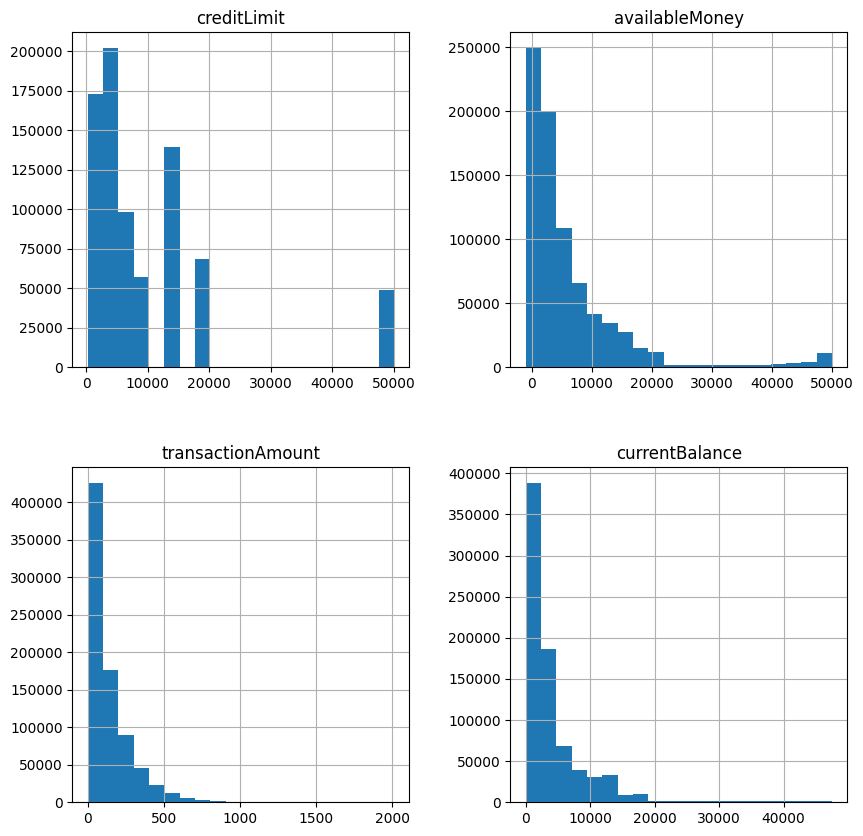

In [18]:
# checking the distribution of currency columns
df[['creditLimit','availableMoney','transactionAmount','currentBalance']].hist(bins = 20 , figsize= (10,10))

In [19]:
# inspecting df columns
#df.columns

**3.2 Inspecting Location based columns**

In [20]:
#inspecting "acqCountry"
df['acqCountry'].value_counts()

,count
acqCountry,
US,774709
MEX,3130
CAN,2424
PR,1538


In [21]:
#inspecting "merchantCountryCode"
df['merchantCountryCode'].value_counts()

,count
merchantCountryCode,
US,778511
MEX,3143
CAN,2426
PR,1559


In [22]:
# checking the count of equal values in "acqCountry" and "merchantCountryCode" column
equal_count = (df['acqCountry'] == df['merchantCountryCode']).sum()
equal_count

781731

In [23]:
# checking the count of unequal values in "acqCountry" and "merchantCountryCode" column
unequal_count = (df['acqCountry'] != df['merchantCountryCode']).sum()
unequal_count

4632

In [24]:
# calculating fraud rate for each "merchantCountryCode"

country_fraud_summary = df.groupby('merchantCountryCode').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

country_fraud_summary['fraud_rate'] = (country_fraud_summary['total_fraud'] / country_fraud_summary['total_transactions'])*100
country_fraud_summary

,total_transactions,total_fraud,fraud_rate
merchantCountryCode,,,
CAN,2426,56,2.308326
MEX,3143,64,2.036271
PR,1559,27,1.731879
US,778511,12188,1.565553


**Observations:**



1.   Most of the values in Merchant country Code and Acq country seems to match, indicating most of the transactions are local transactions.
2.   Some of values in both columns doesn't match which indicates certain transactions could be cross country / international transactions. However, these columns have null values which could increase the number of mismatches.
3. Countries like Canada and Mexico has a higher fraud rate.



**3.3 Inspecting Merchant Category**

In [25]:
# unique merchantCategoryCode
print(f"Number of unique Merchant Categories: {df['merchantCategoryCode'].nunique()}")

Number of unique Merchant Categories: 19


In [26]:
# calculating fraud rate and total transaction volume for each "merchantCategoryCode"
mc_fraud_summary = df.groupby('merchantCategoryCode').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

mc_fraud_summary['fraud_rate'] = (mc_fraud_summary['total_fraud'] / mc_fraud_summary['total_transactions'])*100
mc_fraud_summary = mc_fraud_summary.reset_index()
mc_fraud_summary = mc_fraud_summary.sort_values(by='total_transactions', ascending=False)
mc_fraud_summary = pd.DataFrame(mc_fraud_summary)
mc_fraud_summary

,merchantCategoryCode,total_transactions,total_fraud,fraud_rate
14,online_retail,202156,4938,2.442668
4,fastfood,112138,1074,0.957748
3,entertainment,80098,961,1.199780
5,food,75490,1014,1.343224
13,online_gifts,66238,1606,2.424590
17,rideshare,51136,1272,2.487484
11,hotels,34097,250,0.733202
7,fuel,23910,0,0.000000
18,subscriptions,22901,216,0.943190
1,auto,21651,273,1.260912


Text(0, 0.5, 'MerchantCategory')

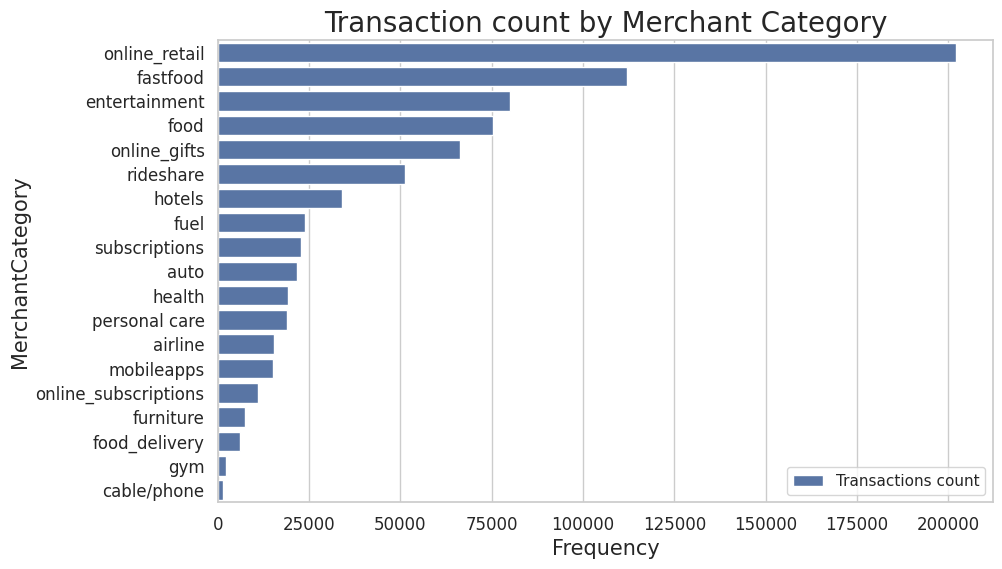

In [79]:
# bar plot: transaction volume by Merchant Category

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# plotting a bar plot
bar1 = sns.barplot(y="merchantCategoryCode", x="total_transactions", data=mc_fraud_summary, label="Transactions count")

# formatting tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# setting title and label
plt.title("Transaction count by Merchant Category", loc='center',fontsize=20)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('MerchantCategory',fontsize=15)

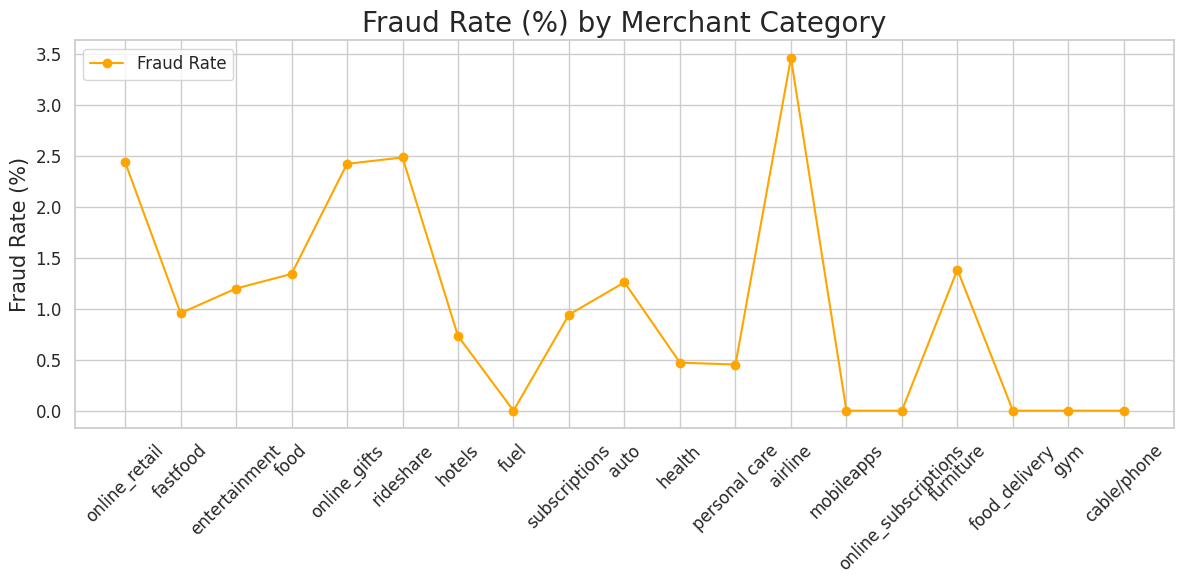

In [28]:
# line plot: fraud rate by Merchant Category

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# plotting line for fraud rate
ax.plot(mc_fraud_summary["merchantCategoryCode"], mc_fraud_summary["fraud_rate"], linestyle='-', marker = 'o', color = 'orange', label="Fraud Rate")

ax.set_ylabel('Fraud Rate (%)', fontsize=15)

plt.title("Fraud Rate (%) by Merchant Category", loc='center',fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Adding legends for both y-axes
ax.legend(loc="upper left", fontsize=12)

# Adjust layout to prevent overlap
f.tight_layout()

# Display plot
plt.show()

**Observations:**



1.   Online Retail shopping, Fast food and Entertainment seems to be the top 3 spending categories for the customers.
2.   Airline transactions seems to have the most number of fraudlent transactions with almost 3.5% of transactions flagged as Fraud. Online retail, Online gifts and rideshare also have higher fraud rate with almost 2.5% of fraud transactions.



**3.4 Inspecting Transaction Type**

In [29]:
tran_df = df['transactionType'].value_counts().reset_index(drop=False)
tran_df.columns=['TransactionType','Frequency']
tran_df = pd.DataFrame(tran_df)
tran_df

,TransactionType,Frequency
0,PURCHASE,745193
1,REVERSAL,20303
2,ADDRESS_VERIFICATION,20169


Text(0, 0.5, 'Frequency')

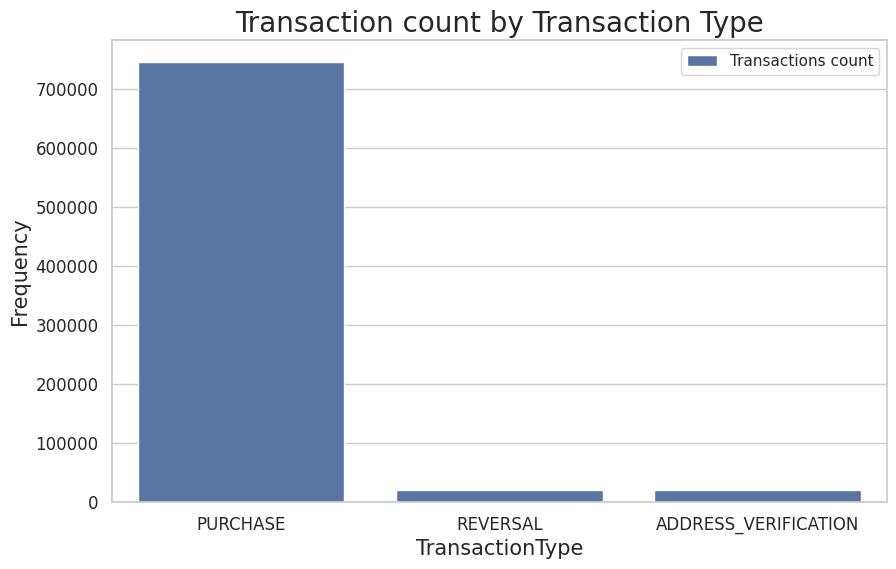

In [30]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# plotting a bar plot
bar1 = sns.barplot(x="TransactionType", y="Frequency", data=tran_df, label="Transactions count")

# formatting tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# setting title and label
plt.title("Transaction count by Transaction Type", loc='center',fontsize=20)
plt.xlabel('TransactionType',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

In [31]:
# inspecting ADDRESS_VERIFICATION Transaction Type
df[df['transactionType']=='ADDRESS_VERIFICATION'].transactionAmount.sum()

0.0

**Observations:**



1.   Few transactions are reversals and few more are address verifications which are different from actual pruchases made by customer.
2. All address verification transactions have transaction amount = 0 indicating it's not a valid transaction.

**Approach:**

These are not actual transactions and hence can be removed from dataset before modelling to reduce noice.



**3.5 Inspecting Credit Limit**

In [32]:
# unique Credit Limit
print(f"Number of unique Credit Limits: {df['creditLimit'].nunique()}")

Number of unique Credit Limits: 10


In [33]:
# calculating fraud rate and total transaction volume for each "Credit Limit"

cl_fraud_summary = df.groupby('creditLimit').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

cl_fraud_summary['fraud_rate'] = (cl_fraud_summary['total_fraud'] / cl_fraud_summary['total_transactions'])*100
cl_fraud_summary = cl_fraud_summary.reset_index()
cl_fraud_summary = cl_fraud_summary.sort_values(by='creditLimit')
cl_fraud_summary = pd.DataFrame(cl_fraud_summary)
cl_fraud_summary

,creditLimit,total_transactions,total_fraud,fraud_rate
0,250,34025,407,1.196179
1,500,27097,465,1.716057
2,1000,36430,546,1.498765
3,2500,75429,1116,1.479537
4,5000,201863,3527,1.747225
5,7500,97913,1290,1.317496
6,10000,56889,766,1.346482
7,15000,139307,2545,1.826900
8,20000,68629,914,1.331799
9,50000,48781,841,1.724032


Text(0, 0.5, 'Frequency')

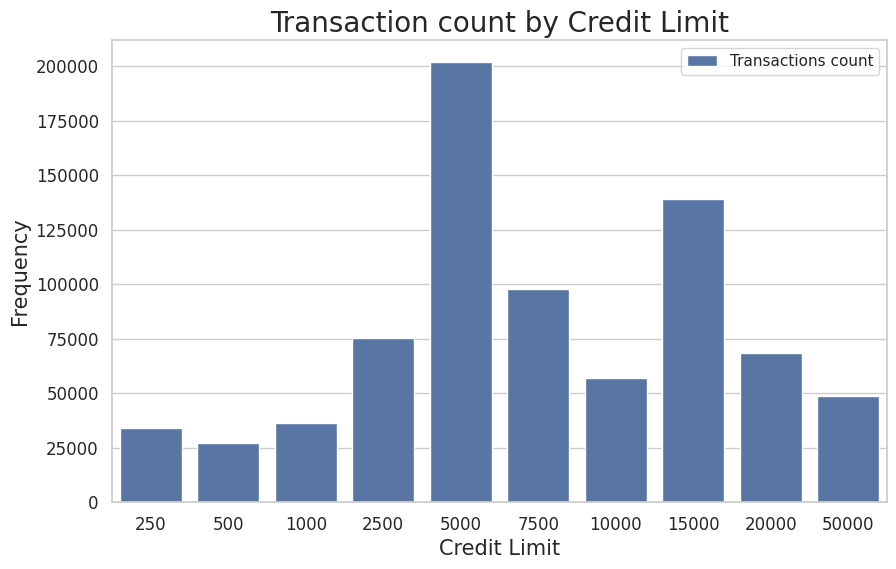

In [34]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# plotting a bar plot
bar1 = sns.barplot(x="creditLimit", y="total_transactions", data=cl_fraud_summary, label="Transactions count")

# formatting tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# setting title and label
plt.title("Transaction count by Credit Limit", loc='center',fontsize=20)
plt.xlabel('Credit Limit',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

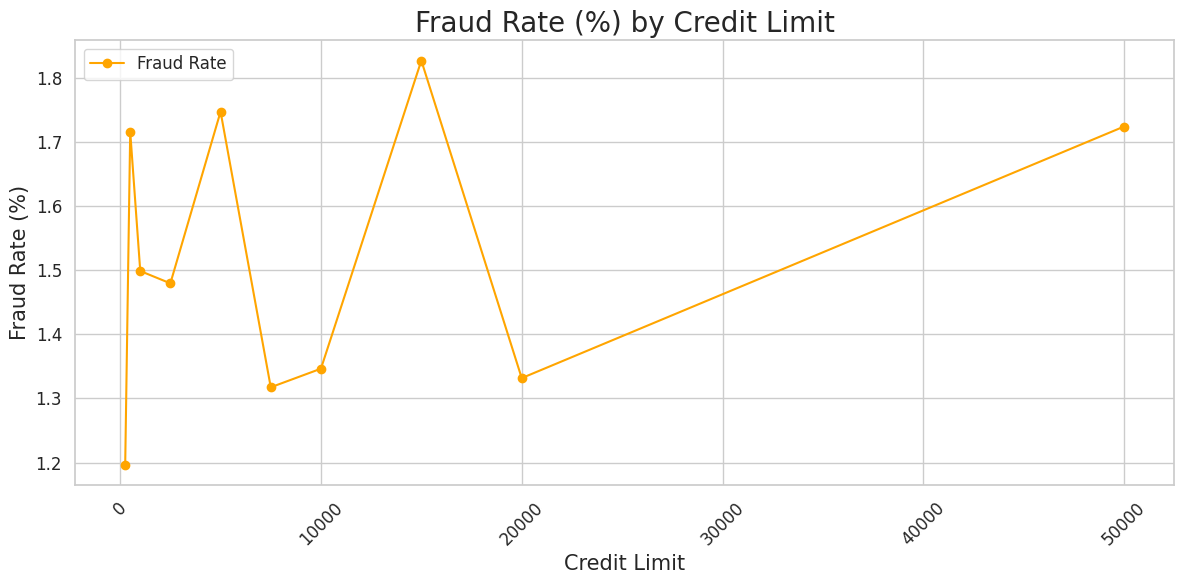

In [35]:
# line plot: fraud rate by Merchant Category

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# plotting line for fraud rate
ax.plot(cl_fraud_summary["creditLimit"], cl_fraud_summary["fraud_rate"], linestyle='-', marker = 'o', color = 'orange', label="Fraud Rate")

ax.set_ylabel('Fraud Rate (%)', fontsize=15)
ax.set_xlabel('Credit Limit', fontsize=15)

# adding title and setting ticks
plt.title("Fraud Rate (%) by Credit Limit", loc='center',fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Adding legends for both y-axes
ax.legend(loc="upper left", fontsize=12)

# Adjust layout to prevent overlap
f.tight_layout()

# Display plot
plt.show()

**3.6 Inspecting boolean columns**

In [36]:
# inspecting cardPresent column

card_fraud_summary = df.groupby('cardPresent').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

card_fraud_summary['fraud_rate'] = (card_fraud_summary['total_fraud'] / card_fraud_summary['total_transactions'])*100
card_fraud_summary = card_fraud_summary.reset_index()
card_fraud_summary = pd.DataFrame(card_fraud_summary)
card_fraud_summary

,cardPresent,total_transactions,total_fraud,fraud_rate
0,False,433495,8962,2.067383
1,True,352868,3455,0.979120


In [37]:
# inspecting expirationDateKeyInMatch column

df['expirationDateKeyInMatch'].value_counts()

exp_fraud_summary = df.groupby('expirationDateKeyInMatch').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

exp_fraud_summary['fraud_rate'] = (exp_fraud_summary['total_fraud'] / exp_fraud_summary['total_transactions'])*100
exp_fraud_summary = exp_fraud_summary.reset_index()
exp_fraud_summary = pd.DataFrame(exp_fraud_summary)
exp_fraud_summary

,expirationDateKeyInMatch,total_transactions,total_fraud,fraud_rate
0,False,785320,12404,1.579484
1,True,1043,13,1.246405


**Observations:**



1.   In transactions where card was not present, fraud rate seems to be high (double) when compared to card transactions.
2.   In transactions where expiration key didn't match, fraud rate is slightly higher.
3. Both of the colummns could be good features for fraud prediction.



**3.7 Inspecting POS columns**

In [38]:
# inspecting posEntryMode column

df['posEntryMode'].value_counts()

pos_fraud_summary = df.groupby('posEntryMode').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

pos_fraud_summary['fraud_rate'] = (pos_fraud_summary['total_fraud'] / pos_fraud_summary['total_transactions'])*100
pos_fraud_summary = pos_fraud_summary.reset_index()
pos_fraud_summary = pd.DataFrame(pos_fraud_summary)
pos_fraud_summary

,posEntryMode,total_transactions,total_fraud,fraud_rate
0,02,195934,3421,1.745996
1,05,315035,2456,0.779596
2,09,236481,5659,2.393004
3,80,15283,240,1.570372
4,90,19576,372,1.900286


In [39]:
# inspecting posConditionCode column

df['posConditionCode'].value_counts()

posc_fraud_summary = df.groupby('posConditionCode').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

posc_fraud_summary['fraud_rate'] = (posc_fraud_summary['total_fraud'] / posc_fraud_summary['total_transactions'])*100
posc_fraud_summary = posc_fraud_summary.reset_index()
posc_fraud_summary = pd.DataFrame(posc_fraud_summary)
posc_fraud_summary

,posConditionCode,total_transactions,total_fraud,fraud_rate
0,01,628787,10230,1.626942
1,08,149634,1936,1.293824
2,99,7533,229,3.039958


**3.8 Inspecting Target Variable**

In [40]:
# inspecting isFraud
df['isFraud'].value_counts()

,count
isFraud,
False,773946
True,12417


In [41]:
print(f"% of Fraudulent transactions: {(12417/786363)*100:.2f}%")

% of Fraudulent transactions: 1.58%


**Observations:**

The number of Fraud instances in the dataset is very less compared to non fraud instances which indicates the imbalanced nature of data.

**Approach:**

To combat class imbalance, i'm use techniques like Oversampling or Undersampling to improve model's predictive power and performance.

# **4. Data Preprocessing**

### > **Q3: Data Wrangling - Identifying Duplicate Transactions**

**Approach:**
1. To identify reversal transactions, I considered two methods:
   - **Method 1:** Filter transactions where `transactionType == 'REVERSAL'`.
   - **Method 2:** Identify reversals by matching transactions with the same merchant, account, and amount where a 'reversal' follows a 'purchase' within a short timeframe.
2. For multi-swipe transactions, I sorted transactions by account, merchant and transaction timestamp, then flagged repeated transactions occurring within 5 minutes.

**Insights:**

1. **Reversals**: Method 1 was chosen for identifying reversal transactions because Method 2 left approximately 2,000 transactions unmatched, likely due to data inconsistencies.

2. **Reversal Transactions**:
   - **Total Count**: 20,303
   - **Estimated Dollar Value**: $2,821,792.50

3. **Multi-Swipe Transactions**:
   - **Total Count**: 13,492
   - **Estimated Dollar Value**: $1,931,990.04

**4.1 Inspecting reversal transactions**

Approach 1: Transactions where Transaction Type == REVERSAL

In [42]:
# filter for reversal transactions
reversal_df = df[df['transactionType']=='REVERSAL']

In [43]:
# inspecting reversal df
#reversal_df.head()

In [44]:
# print transaction count and estimated dollar amount
print(f"No of Reversal transactions: {reversal_df.shape[0]}")
print(f"Total estimated reversal transaction amount: ${reversal_df['transactionAmount'].sum():,.2f}")

No of Reversal transactions: 20303
Total estimated reversal transaction amount: $2,821,792.50


Approach 2: Transactions where reversal can be matched with purchase with same merchant, account, transaction amount where 'reversal' is followed by 'purchase'

In [45]:
# Separate purchases and reversals into two DataFrames
purchases = df[df['transactionType'] == 'PURCHASE']
reversals = df[df['transactionType'] == 'REVERSAL']

# Merge to find matching purchase and reversal pairs
merged = pd.merge(
    purchases, reversals,
    on=['accountNumber', 'merchantName', 'transactionAmount'],
    suffixes=('_purchase', '_reversal')
)

# Filter to ensure that the reversal happens after the purchase
reversed_transactions = merged[merged['transactionDateTime_reversal'] > merged['transactionDateTime_purchase']]

In [46]:
# inspecting reversal df
#reversed_transactions[['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime_purchase','transactionType_purchase','transactionDateTime_reversal','transactionType_reversal']]

In [47]:
# print transaction count and estimated dollar amount
print(f"No of Reversal transactions: {reversed_transactions.shape[0]}")
print(f"Total estimated reversal transaction amount: ${reversed_transactions['transactionAmount'].sum():,.2f}")

No of Reversal transactions: 17999
Total estimated reversal transaction amount: $2,701,311.87


**4.2 Inspecting Multi Swipe Transactions**

In [48]:
# sort transactions by account, merchant name and transaction date time in ascending order
sorted_df = df.sort_values(by=['accountNumber', 'merchantName', 'transactionDateTime'], ascending=True)

#sorted_df[['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime']]

In [49]:
# converting transactionDateTime to datetime format
sorted_df['transactionDateTime'] = pd.to_datetime(sorted_df['transactionDateTime'])

In [50]:
# getting previous transaction amount and datetime
sorted_df['prev_transaction_amount'] = sorted_df.groupby('accountNumber')['transactionAmount'].shift(1)
sorted_df['prev_transaction_datetime'] = sorted_df.groupby('accountNumber')['transactionDateTime'].shift(1)

In [51]:
#sorted_df.head()

In [52]:
# filter repeated transactions within 5 minute time window to identify multiswipes
time_window = timedelta(minutes=5)

sorted_df['isMultiSwipe'] = ((sorted_df['transactionAmount'] == sorted_df['prev_transaction_amount']) &
                            (sorted_df['transactionDateTime'] - sorted_df['prev_transaction_datetime'] <= time_window))

In [53]:
# inspecting multi_swipe_df
multi_swipe_df = sorted_df[sorted_df['isMultiSwipe'] == True]
#multi_swipe_df

In [54]:
# print transaction count and estimated dollar amount
print(f"No of Multi Swipe transactions: {multi_swipe_df.shape[0]}")
print(f"Total estimated multi swipe transaction amount: ${multi_swipe_df['transactionAmount'].sum():,.2f}")

No of Multi Swipe transactions: 13492
Total estimated multi swipe transaction amount: $1,931,990.04


In [55]:
# manual check 1
sorted_df[(sorted_df['accountNumber']==100088067) & (sorted_df['transactionAmount']== 411.35)][['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime','prev_transaction_amount','prev_transaction_datetime','transactionType','isMultiSwipe']]

,accountNumber,merchantName,transactionAmount,transactionDateTime,prev_transaction_amount,prev_transaction_datetime,transactionType,isMultiSwipe
541955,100088067,Fresh Flowers,411.35,2016-10-16 18:01:00,21.59,2016-09-02 03:40:54,PURCHASE,False
541956,100088067,Fresh Flowers,411.35,2016-10-16 18:01:02,411.35,2016-10-16 18:01:00,PURCHASE,True


In [56]:
# manual check 2
sorted_df[(sorted_df['accountNumber']==100737756) & (sorted_df['transactionAmount']== 693.50)][['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime','prev_transaction_amount','prev_transaction_datetime','transactionType','isMultiSwipe']]

,accountNumber,merchantName,transactionAmount,transactionDateTime,prev_transaction_amount,prev_transaction_datetime,transactionType,isMultiSwipe
151426,100737756,Franks Deli,693.5,2016-01-18 01:55:24,83.32,2016-12-11 20:11:14,PURCHASE,False
151427,100737756,Franks Deli,693.5,2016-01-18 01:55:28,693.50,2016-01-18 01:55:24,PURCHASE,True
151428,100737756,Franks Deli,693.5,2016-01-18 01:58:26,693.50,2016-01-18 01:55:28,PURCHASE,True


In [57]:
multi_swipe_df['isFraud'].value_counts()

,count
isFraud,
False,13259
True,233


# **5. Data Cleaning**

**Approach:**

1. **Filter Out Duplicate Transactions**: Remove Reversal and Multi-Swipe transactions as they represent duplicates and do not add meaningful information for fraud detection.
  
2. **Drop Unnecessary Columns**: Remove columns with all null values and any manually created columns not needed for analysis.

3. **Handle Rows with Null Values**: Drop rows with null values, as they represent less than 1% of the data and will not significantly impact model performance.

In [58]:
# filter out duplicate transactions

clean_df = sorted_df[sorted_df['isMultiSwipe'] == False]
clean_df = clean_df[clean_df['transactionType'] == 'PURCHASE']

In [59]:
#clean_df

In [60]:
# dropping columns with null values and other manually created columns
clean_df.drop(columns=['prev_transaction_amount', 'prev_transaction_datetime', 'isMultiSwipe','recurringAuthInd','posOnPremises',
                       'merchantZip','merchantState','merchantCity','echoBuffer'], inplace=True)

In [61]:
# dropping rows with null values
clean_df = clean_df.dropna()

In [62]:
# final shape
clean_df.shape

(729280, 23)

In [63]:
# list of columns before feature engineering
clean_df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')


# **6. Feature Engineering and Selection**

### Q4: Feature Selection

**Approach:**

1. **Feature Engineering**: Based on EDA and data inspection, I identified columns that could be potential predictors of fraud. Some of these columns did not provide meaningful information directly, so I created new features with my business intuition.

2. **Feature Selection**: After analyzing feature importance and correlation, certain features were dropped as they did not contribute much to fraud prediction.

**Features Created:**

- **Credit Utilization Ratio**: Ratio of `currentBalance` to `creditLimit`.
- **cvv_match**: Binary flag indicating whether `cardCVV` matches `enteredCVV`.
- **country_match**: Binary flag indicating if the transaction is domestic (in-country) or international.
- **recent_account_open**: Binary flag for transactions occurring within 30 days of account opening.
- **recent_address_change**: Binary flag for transactions occurring within 30 days of the last address change.
- **transaction_hour** and **transaction_day_of_week**: Extracted from the transaction timestamp.

**Features Dropped:**

- **creditLimit**, **recent_account_open**, **expirationDateKeyInMatch**, **country_match**

**Final Features Selected:**

- **availableMoney**, **transactionAmount**, **merchantCountryCode**, **posEntryMode**, **posConditionCode**, **merchantCategoryCode**, **cardPresent**, **utilization_ratio**, **cvv_match**, **transaction_hour**, **transaction_day_of_week**, **recent_address_change**

In [64]:
# creating a copy of the cleaned dataframe - i will be using this to generate new features
transform_df = clean_df.copy()

**6.1 Credit Utilization Ratio**

**Rationale:**
1.   The columns - 'currentBalance', 'creditLimit' and 'availableMoney' are related, where creditLimit = currentBalance + availableMoney. Given this relationship, it's highly likely that these columns could be correlated.
**Approach:**
2.    To reduce redundancy, i will remove one of the columns and introduce a new feature where "utilization_ratio = currentBalance/creditLimit".
**Justification:**
3. It gives a measure of how much credit is being utilized which could be a good predictor of fraud.



In [65]:
# introducing a new feature - credit utilization ratio
transform_df['utilization_ratio'] = transform_df['currentBalance'] / transform_df['creditLimit']

**6.2 CVV Match**

**Rationale:**
1.   cardCVV and enteredCVV - both columns have lot of similar values. Given this relationship, it's highly likely that these columns could be correlated.
**Approach:**
2.    Create a new feature - cvv_match (binary flag), to check if cardCVV and enteredCVV match. A match indicates the CVV entered was correct, while mismatch suggests an incorrect entry.
**Justification:**
3. Mismatch between these values could be a good predictor of fraud, as incorrect CVV entry could indicate higher fraud risk.


In [66]:
# introducing a new binary feature - cvv_match
transform_df['cvv_match'] = transform_df['cardCVV'] == transform_df['enteredCVV']

**6.3 Country Match**

**Rationale:**
1.   The acqCountry (acquiring bank’s country) and merchantCountryCode (merchant’s country) columns often have matching values, indicating they may be correlated.

**Approach:**
2.    Create a new feature - country_match (binary flag), to check if these columns match. A match suggests a domestic (in-country) transaction, while a mismatch indicates an international transaction.

**Justification:**
3.  Mismatch could be a strong predictor of fraud, as international transactions may often carry higher fraud risk.

In [67]:
# introducing a new binary feature - country_match
transform_df['country_match'] = transform_df['acqCountry'] == transform_df['merchantCountryCode']

**6.4 recent_account_open and recent_address_change**

**Rationale:**
1.   Account open date and Last address change date does not provide meaningful information for the model.

**Approach:**
2.    Create 2 new features - recent_account_open (binary flag) to check if transaction happened within 30 days of account opening and recent_address_change (binary flag) to check if transaction happened within 30 days of last address change.

**Justification:**
3.  'False' could be a strong predictor of fraud, as new accounts and recent address change transactions may often carry higher fraud risk.

In [68]:
# convert to datetime
transform_df['accountOpenDate'] = pd.to_datetime(transform_df['accountOpenDate'])
transform_df['dateOfLastAddressChange'] = pd.to_datetime(transform_df['dateOfLastAddressChange'])

In [69]:
# define threshold
days_threshold = pd.Timedelta(days=30)

# check if account opened within the last 30 days of the transaction
transform_df['recent_account_open'] = (transform_df['transactionDateTime'] - transform_df['accountOpenDate']) <= days_threshold

# check if address changed within the last 30 days of the transaction
transform_df['recent_address_change'] = (transform_df['transactionDateTime'] - transform_df['dateOfLastAddressChange']) <= days_threshold


**6.5 transaction_hour and transaction_day_of_week**

**Rationale:**
1.   Transaction date date does not provide meaningful information for the model.

**Approach:**
2.    Create 2 new features - transaction_hour and transaction_day_of_week to create more meanigful features.

**Justification:**
3.  Fraud transaction typically have odd patterns as it may occur at unusual hours

In [70]:
# transaction hour
transform_df['transaction_hour'] = transform_df['transactionDateTime'].dt.hour

# transaction day of week
transform_df['transaction_day_of_week'] = transform_df['transactionDateTime'].dt.dayofweek

**6.1 Feature Selection**

In [71]:
# dropping unnecessary/redundant columns after feature engineering
transform_df.drop(columns=['accountNumber','customerId','merchantName','cardLast4Digits','accountOpenDate','dateOfLastAddressChange','cardCVV','currentExpDate','enteredCVV','currentBalance','transactionDateTime','transactionType','acqCountry'], inplace=True)

In [72]:
# inspecting the dataframe after creating features
#transform_df.head()

In [73]:
# final shape
transform_df.shape

(729280, 17)

In [74]:
transform_df.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'cardPresent', 'expirationDateKeyInMatch',
       'isFraud', 'utilization_ratio', 'cvv_match', 'country_match',
       'recent_account_open', 'recent_address_change', 'transaction_hour',
       'transaction_day_of_week'],
      dtype='object')

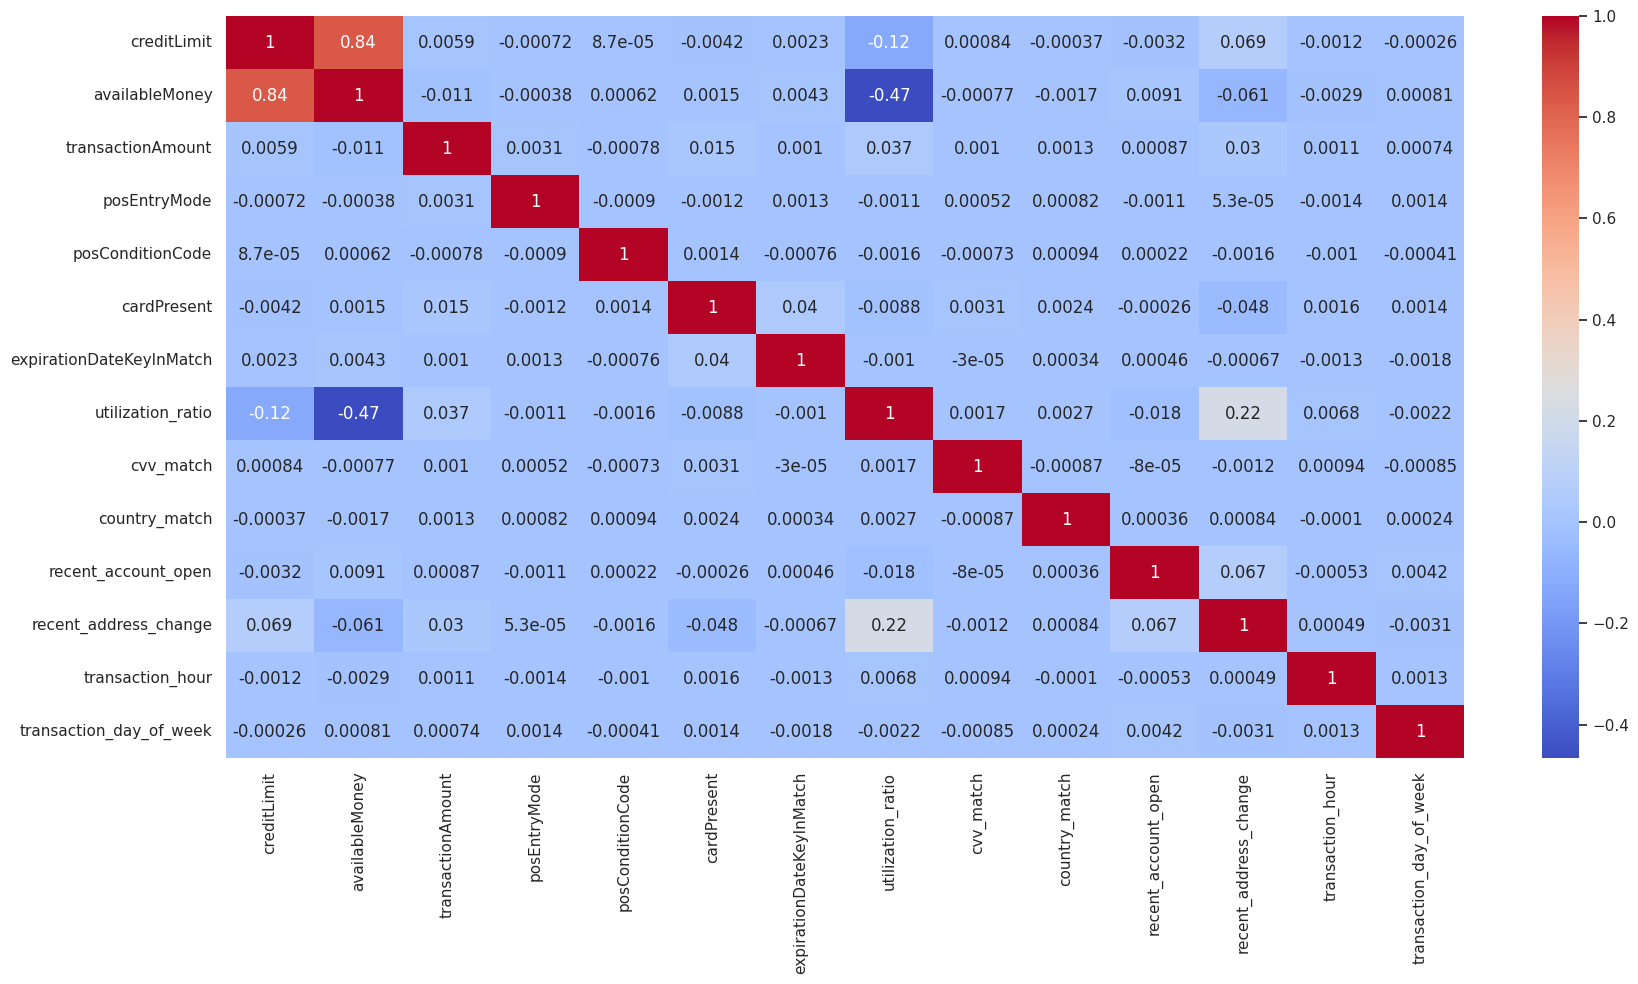

In [75]:
# correlation heatmap
corr_df = transform_df[['creditLimit', 'availableMoney', 'transactionAmount', 'posEntryMode',
            'posConditionCode','cardPresent', 'expirationDateKeyInMatch',
       'utilization_ratio', 'cvv_match', 'country_match',
       'recent_account_open', 'recent_address_change', 'transaction_hour',
       'transaction_day_of_week']]
fig = plt.figure(figsize=(18,10))
sns.heatmap(corr_df.corr(),annot=True,cmap="coolwarm")
plt.tight_layout()

In [76]:
# dropping columns with high correlation and less feature importance
transform_df.drop(columns=['creditLimit','recent_account_open','expirationDateKeyInMatch','country_match'], inplace=True)

**Final Features selected:**

In [77]:
transform_df.columns

Index(['availableMoney', 'transactionAmount', 'merchantCountryCode',
       'posEntryMode', 'posConditionCode', 'merchantCategoryCode',
       'cardPresent', 'isFraud', 'utilization_ratio', 'cvv_match',
       'recent_address_change', 'transaction_hour', 'transaction_day_of_week'],
      dtype='object')

# **7. Feature Transformation**

**Approach:**

1. **Encoding**: Applied encoding to categorical and boolean columns to make them suitable for modeling.
2. **Separate Target and Features**: Removed the target variable to create feature and target sets separately.
3. **Scaling**: Used Robust Scaler on numerical columns to handle skewness and outliers, which is beneficial in imbalanced datasets.
4. **Train-Test Split**: Split data into Train, Validation, and Holdout sets with stratification to maintain class distribution, helping to mitigate class imbalance and reduce overfitting.
5. **Undersampling**: Chose undersampling for the majority class to address class imbalance while considering compute constraints. Undersampling also helped in managing dataset size effectively.

**7.1 One Hot Encoding**

In [84]:
#importing necessary libraries for modelling

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_curve, roc_auc_score, precision_recall_curve, auc, make_scorer, confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

In [85]:
# encoding for categorical columns
categorical_columns = ['merchantCountryCode', 'merchantCategoryCode', 'posEntryMode', 'posConditionCode']
transform_df = pd.get_dummies(transform_df, columns=categorical_columns, drop_first=True)

# encoding for boolean columns
boolean_columns = ['cardPresent', 'cvv_match', 'recent_address_change','isFraud']

transform_df[boolean_columns] = transform_df[boolean_columns].astype(int)

In [86]:
#transform_df.head()

**7.2 Removing Target variables and Features**

In [87]:
# removing target variable and reassigning it to y
X=transform_df.drop('isFraud',axis=1)
y=transform_df['isFraud']

**7.3 Scaling numerical columns**

In [88]:
# Define continuous and categorical columns
continuous_cols = ['availableMoney', 'transactionAmount', 'utilization_ratio']
categorical_cols = [col for col in X.columns if col not in continuous_cols]

# Scale only the continuous columns
scaler = RobustScaler()
X_continuous_scaled = scaler.fit_transform(X[continuous_cols])

# Convert categorical columns to numpy format
X_categorical = X[categorical_cols].values

# Concatenate scaled continuous features with categorical features
X_scaled = np.hstack((X_categorical, X_continuous_scaled))

**7.4 Test Train Split**

In [89]:
# perform train test split with stratification
# Split data into train+validation (80%) and holdout test set (20%)
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Further split the training data into actual training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

**7.5 Performing Under sampling to handle class imbalance**

In [90]:
# undersampling majority class
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [91]:
X_train_resampled.shape

(20526, 35)

In [92]:
y_train_resampled.shape

(20526,)

In [93]:
# Check new class distribution
from collections import Counter
print("Class distribution after Undersampling:", Counter(y_train_resampled))

Class distribution after Undersampling: Counter({0: 13684, 1: 6842})


# **8. Modelling**

### > Q4: Modelling Approach



**Approach:**


1.   **Model Selection:** Interpretable models are essential for Fraud Prediction/Classification problems as banks and customers need to understand the reason behind financial decisions made using these kind of models. Hence, i avoided black box models such as neural networks. Considering the imbalanced nature of data, i chose to work with below mentioned models which can handle this imbalance and provide better interpretability.

  *   Logistic Regression
  *   Random Forest
  *   XGBoost
  *   LightGBM


2.   **Model Training:** I employed grid search along with cross validation to find the best hyper parameters and to reduce the risk of overfitting. Selected F1 and AUCROC as scoring metrics to assess performance of training.

3. **Validation:** Evaluated best fit models on validation data to assess training performance and generated classification reports to compare performance against different metrics like Precision, Recall and F1-score.



**8.1 Logistic Regression**

In [94]:
# initialize logit model

logit = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)

#define parameters for grid search
param_grid = {
    'C': [1, 10, 100, 200],
    'penalty': ['l1', 'l2']
}

# Using F1 Score as the scoring metric for imbalanced data
logit_clf = GridSearchCV(logit, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
logit_clf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters from Grid Search
print("Best Parameters from Grid Search:", logit_clf.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters from Grid Search: {'C': 200, 'penalty': 'l2'}


In [95]:
# Use the best parameters to initialize Logistic Regression
best_logit = LogisticRegression(
    penalty=logit_clf.best_params_['penalty'],
    C=logit_clf.best_params_['C'],
    class_weight='balanced',
    solver='liblinear',
    max_iter=1000
)
best_logit.fit(X_train_val, y_train_val)

LogisticRegression(C=200, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

In [96]:
# Predictions on the test set
y_pred = best_logit.predict(X_val)

# Classification report
print("Classification Report - Logit Test:\n", classification_report(y_val, y_pred))

Classification Report - Logit Test:
               precision    recall  f1-score   support

           0       0.99      0.65      0.78    143575
           1       0.03      0.71      0.06      2281

    accuracy                           0.65    145856
   macro avg       0.51      0.68      0.42    145856
weighted avg       0.98      0.65      0.77    145856



**Insights:**



1.   Recall for Fraud Class = 71%: The logistic model captures a high percentage of fraud cases , which indicates its effectiveness in identifying fraudulent transactions.
2.   Precision for Fraud Class = 3%: Low precision indicates that many legitimate transactions are mistakenly flagged as Fraud which can often cause friction between customers and bank.



**8.2 Random Forest**

In [97]:
# initialize random forest
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

# define hyperparameter grid
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [15, 20, 25],
    'min_samples_split': [15, 20, 25],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Using F1 Score as the scoring metric for imbalanced data
rf_clf = GridSearchCV(rf, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Display best parameters
print("Best Parameters from Grid Search:", rf_clf.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters from Grid Search: {'class_weight': 'balanced_subsample', 'max_depth': 15, 'min_samples_split': 25, 'n_estimators': 150}


In [98]:
# Initialize with best parameters and train
best_rf = RandomForestClassifier(
    n_estimators=rf_clf.best_params_['n_estimators'],
    max_depth=rf_clf.best_params_['max_depth'],
    min_samples_split=rf_clf.best_params_['min_samples_split'],
    class_weight='balanced_subsample',
    random_state=42
)
best_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       min_samples_split=25, n_estimators=150, random_state=42)

In [99]:
# Predictions on the test set
y_pred = best_rf.predict(X_val)

# Classification report
print("Classification Report - Random Forest Test:\n", classification_report(y_val, y_pred))

Classification Report - Random Forest Test:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85    143575
           1       0.04      0.63      0.07      2281

    accuracy                           0.74    145856
   macro avg       0.51      0.69      0.46    145856
weighted avg       0.98      0.74      0.84    145856



**Insights:**

1.   Recall for Fraud Class = 63%: The Random Forest model captures a moderate percentage of fraud cases compared to logisitc, which indicates its effectiveness in identifying fraudulent transactions.
2.   Precision for Fraud Class = 4%: Precision is still very low although slightly better than Logistic Model.


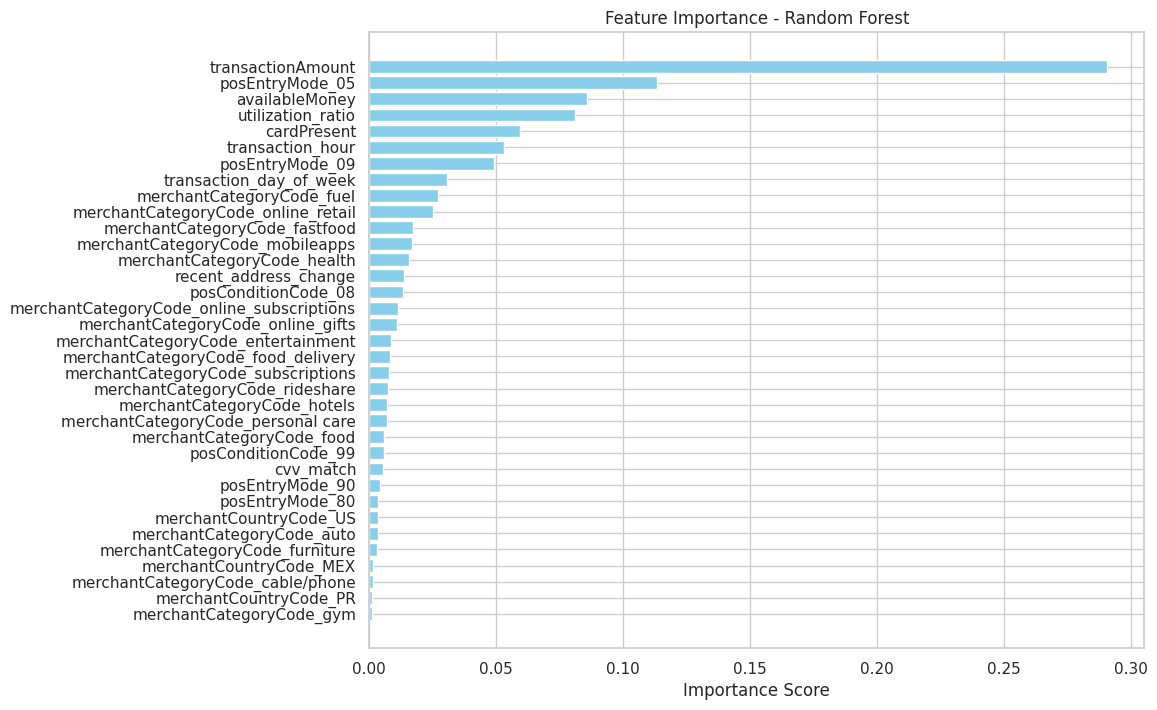

In [100]:
# get feature importance from random forest model
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.show()

**8.3 XGBoost**

In [101]:
# initialize xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric="aucpr")

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 10, 15, None],
    'learning_rate': [0.001, 0.005, 0.05, 0.01, 0.1],
    'scale_pos_weight': [y_train.value_counts()[0] / y_train.value_counts()[1]],
    #'tree_method': ['gpu_hist']
}

# Grid search with cross-validation
xgb_clf = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = xgb_clf.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 62.95323004969307}


In [102]:
# Train with the best parameters from grid search
xgb_best = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42, eval_metric="aucpr")

# Fit the model
xgb_best.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [103]:
# Predictions
y_pred_xgb = xgb_best.predict(X_val)

# Classification Report
print("Classification Report - XGB Test:\n", classification_report(y_val, y_pred_xgb))

Classification Report - XGB Test:
               precision    recall  f1-score   support

           0       1.00      0.11      0.20    143575
           1       0.02      1.00      0.03      2281

    accuracy                           0.12    145856
   macro avg       0.51      0.55      0.12    145856
weighted avg       0.98      0.12      0.19    145856



**Insights:**

1.  Recall for Fraud Class = 94%: The XGB model captures a high percentage of fraud cases compared to logistic and Random Forest, which indicates its effectiveness in identifying fraudulent transactions.
2.   Precision for Fraud Class = 2%: Precision is very low and lesser than previous models.

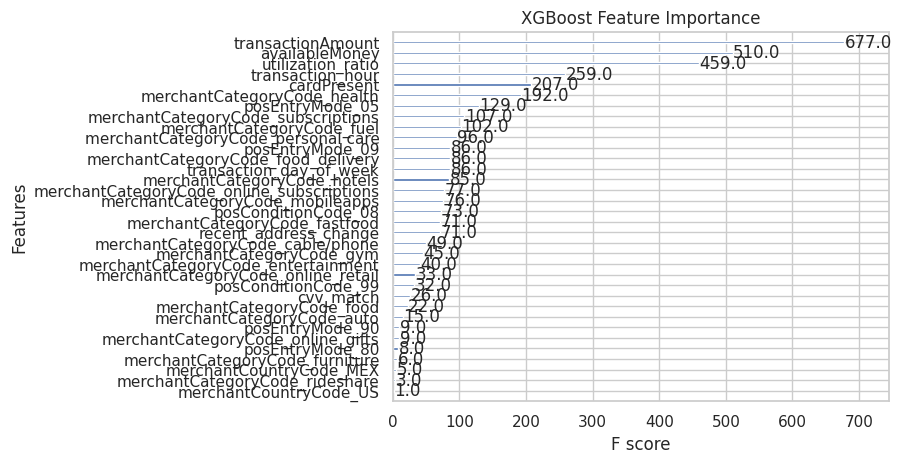

In [104]:
# Plot feature importance for XGBoost
xgb.plot_importance(xgb_best, importance_type='weight')
plt.title("XGBoost Feature Importance")
plt.show()

**8.4 LightBGM**

In [ ]:
# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', verbose=-1, random_state=42)

# Define LightGBM parameters
param_grid = {
    'num_leaves': [10,15, 20],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 150, 200],
    'scale_pos_weight': [y_train.value_counts()[0] / y_train.value_counts()[1]],
   # 'device': ['gpu']
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

In [ ]:
lgb_best = lgb.LGBMClassifier(**best_params, boosting_type='gbdt', objective='binary', random_state=42)
lgb_best.fit(X_train_val, y_train_val)

In [ ]:
# Make predictions
y_pred_lgb = lgb_best.predict(X_val)

# Classification Report
print("Classification Report - LGB Test:\n", classification_report(y_val, y_pred_lgb))

**Insights:**

1.  Recall for Fraud Class = 71%: The LGB model captures a high percentage of fraud cases compared to other models, which indicates its effectiveness in identifying fraudulent transactions.
2.   Precision for Fraud Class = 4%: Precision is very low but better than previous models.

# **9. Model Evaluation**

###> Q4: Evaluation Approach



1. **Primary Metrics Selection:**
   - **Precision, Recall, and F1-Score:** Given the imbalanced nature of the data, these metrics are critical for evaluating fraud detection performance.
     - **Recall** is particularly important as it measures the model’s ability to detect fraud cases (minimizing false negatives).
     - **Precision** helps monitor false positives, as we aim to avoid excessive false alerts.
     - **F1-Score** balances precision and recall, giving a single score to assess model performance.
   - **AUC-ROC and AUC-PR:** Used to capture overall model performance in handling class imbalance.
     - **AUC-ROC** is helpful to compare models’ ability to distinguish between fraud and non-fraud classes.
     - **AUC-PR** is effective when focusing on minority class performance, providing insight into how well the model detects fraud across different thresholds.

2. **Model Comparison and Selection:**
   - Evaluated models on the **holdout set** using selected metrics to understand real-world performance.
   - Generated **confusion matrices** to observe the distribution of true positives, false positives, true negatives, and false negatives across models.
   - **ROC and Precision-Recall curves** To visually assess and compare model performance across different models.

**9.1 Using classification report to compare model performace**

In [ ]:
# generate classification report for each model
models = {
    'Logistic Regression': best_logit,
    'Random Forest': best_rf,
    'XGBoost': xgb_best,
    'LightGBM': lgb_best
}

for model_name, model in models.items():
    # Train on the training + validation set
    #model.fit(X_train, y_train)

    # Predict on the holdout set
    y_pred = model.predict(X_holdout)
    y_pred_proba = model.predict_proba(X_holdout)[:, 1]

    print(f"Model: {model_name}")
    print("Classification Report:")
    print(classification_report(y_holdout, y_pred))

    # Calculate AUC-ROC and AUC-PR
    roc_auc = roc_auc_score(y_holdout, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_holdout, y_pred_proba)
    pr_auc = auc(recall, precision)

    print(f"AUC-ROC: {roc_auc:.4f}")
    print(f"AUC-PR: {pr_auc:.4f}\n")

**Model Performance Analysis - Classfication Report**

1. Logistic Regression shows a high recall for fraud but very low precision, leading to numerous false positives. The overall accuracy and AUC metrics indicate moderate performance.
2. Random Forest improves accuracy and f1-score, capturing more fraud cases than logistic regression but with a slight compromise on precision.
3. XGBoost demonstrates high accuracy but a very low recall for fraud, suggesting that it struggles to detect fraud cases while maintaining high precision for the legitimate class.
4. LightGBM provides a balance between recall and precision, performing comparably to Random Forest with a slight improvement in recall for fraud cases. Its AUC scores are also strong.


**9.2 Using confusion matrix to compare model performance**

In [ ]:
# plot confusion matrix for each model

for model_name, model in models.items():
    y_pred = model.predict(X_holdout)
    cm = confusion_matrix(y_holdout, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

**Model Performance Analysis - Confusion Matrix**

**1. Logistic Regression**
- **Strengths**: Reasonably good at identifying non-fraud transactions with 92,414 true negatives.
- **Weaknesses**: Limited effectiveness in fraud detection, with 1,606 true positives and 675 false negatives.
- **Interpretation**: Performs well on non-fraud cases but has low recall for fraud, making it less effective for detecting fraud.

**2. Random Forest**
- **Strengths**: Higher recall for fraud detection, capturing 1,161 true positives.
- **Weaknesses**: Produces many false positives (25,839) and 1,120 false negatives.
- **Interpretation**: Improves fraud detection over Logistic Regression but at the cost of more false positives.

**3. XGBoost**
- **Strengths**: High accuracy for non-fraud transactions, with minimal false positives (38).
- **Weaknesses**: Extremely low recall for fraud detection, with only 8 true positives and 2,273 false negatives.
- **Interpretation**: Highly biased toward non-fraud cases, making it unsuitable for fraud detection without further tuning.

**4. LightGBM**
- **Strengths**: Balanced fraud detection, with 1,479 true positives and improved recall over other models.
- **Weaknesses**: High false positives (40,470) affect overall accuracy.
- **Interpretation**: Offers a balance between detecting fraud and minimizing false positives, making it the most suitable choice for fraud detection.

**9.3 Using ROC curve and Precision Recall curve**

In [ ]:
# plot roc curve and precision recall curve for each model

plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_holdout)[:, 1]
    fpr, tpr, _ = roc_curve(y_holdout, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_holdout, y_pred_proba):.4f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_holdout)[:, 1]
    precision, recall, _ = precision_recall_curve(y_holdout, y_pred_proba)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {auc(recall, precision):.4f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

**Model Performance Analysis - ROC and Precision-Recall Curves**

**ROC Curve**
- **Interpretation**: Shows the trade-off between recall (true positive rate) and the false positive rate. Higher AUC values indicate better discrimination between fraud and non-fraud cases.
- **Model Performance**:
  - **XGBoost (AUC = 0.7539)** and **LightGBM (AUC = 0.7530)** outperform Logistic Regression and Random Forest, showing stronger discrimination, though XGBoost is biased towards non-fraud cases.
  - **Logistic Regression** and **Random Forest** have AUCs around 0.74, indicating weaker performance in distinguishing between classes.

**Precision-Recall (PR) Curve**
- **Interpretation**: Focuses on precision and recall, critical for imbalanced datasets. Higher AUC-PR scores indicate better handling of the minority class (fraud).
- **Model Performance**:
  - **LightGBM** (AUC-PR = 0.0511) and **XGBoost** (AUC-PR = 0.0510) show the best capability in handling the imbalanced fraud class, though XGBoost’s AUC is driven by the non-fraud class.
  - **Logistic Regression** and **Random Forest** have lower AUC-PR scores (around 0.048), indicating less effectiveness in fraud detection.

# **10. Results**

### > **Q4: Overall Conclusion**



1. **Best Model for Fraud Detection**:
   - **LightGBM** is the most effective model for identifying fraud cases, as it offers the best balance between recall and false positives. Its Precision-Recall AUC (~0.051) indicates it effectively handles the class imbalance, making it suitable for real-world deployment.

2. **Logistic Regression and Random Forest Trade-offs**:
   - **Logistic Regression** is interpretable but has low recall, missing a significant number of fraud cases.
   - **Random Forest** improves fraud detection over Logistic Regression but still has a high rate of false positives, which may impact practical usability.

3. **Why XGBoost is Not Recommended**:
   - **XGBoost** demonstrates high accuracy on non-fraud transactions but performs poorly in identifying fraud cases, with very low recall in the fraud class. This makes it unsuitable for fraud detection, where correctly identifying fraudulent cases is crucial.

4. **Final Recommendation**:
   - **LightGBM** is recommended as the optimal model for deployment due to its balanced performance in detecting fraud cases and managing false positives.

# **11. Challenges and Next Steps**

**Challenges:**
1. **Data Imbalance**: Few fraud cases compared to non-fraud, making it hard to train models effectively.
2. **Compute Limits**: Limited resources restrict complex tuning and model experimentation.

**Next Steps**

1. **Threshold Tuning**: Adjust thresholds to balance precision and recall for better fraud detection.
2. **Ensemble Models**: Combine models like Random Forest and XGBoost to boost performance.
3. **Anomaly Detection**: Try methods like Isolation Forests for spotting unusual patterns.
4. **Feature Engineering**: Add features on transaction behavior such as frequency and timing, for more accuracy.





